# Project: WeRateDogs Tweet Archive Wrangling and Analysis

## Data Gathering
1. Download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image predictions (image_predictions.tsv)

In [ ]:
import requests
import os

In [ ]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name,
                       url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [3]:
image_pred_df = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
import json

tweets_list = []

with open('tweet-json.txt') as json_file:
    for line in json_file:
        try:
            tweet = json.loads(line)
            tweets_list.append(tweet)
        except:
            continue
            
twitter_api_df = pd.DataFrame(tweets_list)[['id', 'retweet_count', 'favorite_count']]

## Assessing Data

In [5]:
archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2311,666781792255496192,NaN,NaN,2015-11-18 00:55:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Bacardi named Octaviath. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666781792...,10,10,a,None,None,None,None
966,750383411068534784,NaN,NaN,2016-07-05 17:38:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoe. She was trying to stealthily take...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750383411...,9,10,Zoe,None,None,pupper,None
1914,674330906434379776,6.658147e+17,16374678.0,2015-12-08 20:53:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10\n@ABC7,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
424,821522889702862852,NaN,NaN,2017-01-18 01:01:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harlso. He has a really good idea but ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821522889...,13,10,Harlso,None,None,None,None
1408,699072405256409088,NaN,NaN,2016-02-15 03:27:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",ERMAHGERD 12/10 please enjoy https://t.co/7WrA...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699072405...,12,10,None,None,None,None,None
507,812709060537683968,NaN,NaN,2016-12-24 17:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brandi and Harley. They are practicing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812709060...,12,10,Brandi,None,None,None,None
437,820078625395449857,NaN,NaN,2017-01-14 01:22:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've never wanted to go to a camp more in my e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820078625...,12,10,None,None,None,None,None
256,843981021012017153,NaN,NaN,2017-03-21 00:22:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HE WAS DOING A SNOOZE NO SHAME IN A SNOOZE 13/...,NaN,NaN,NaN,https://twitter.com/brianstack153/status/79679...,13,10,None,None,None,None,None
500,813112105746448384,NaN,NaN,2016-12-25 20:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He's pupset because his hat isn't b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813112105...,12,10,Toby,None,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None


In [6]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [8]:
archive_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [9]:
retweets_df = archive_df[~archive_df['retweeted_status_id'].isnull()]
print(retweets_df.shape)
retweets_df.head(5)

(181, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


There are 181 retweets in the dataframe

In [10]:
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

The **a** tags and their attributes are not needed.

In [11]:
archive_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [12]:
archive_df.loc[archive_df['name'].str.len() < 3]['name'].value_counts()  

a     55
Bo     9
an     7
Mo     1
O      1
Al     1
my     1
by     1
Ed     1
JD     1
Jo     1
Name: name, dtype: int64

In [13]:
archive_df[['doggo', 'pupper', 'puppo', 'floofer']].duplicated().sum()

2348

In [14]:
archive_df[~archive_df[['doggo', 'pupper', 'puppo', 'floofer']].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,None,None,pupper,None
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None


Some of the dogs in the tweets belong to more than one stage category. 

In [15]:
doggo_puppo_df = archive_df.query('doggo == "doggo" and puppo == "puppo"')
doggo_puppo_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [16]:
doggo_pupper_df = archive_df.query('doggo == "doggo" and pupper == "pupper"')
doggo_pupper_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [17]:
doggo_floofer_df = archive_df.query('doggo == "doggo" and floofer == "floofer"')
doggo_floofer_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [18]:
#Find the tweets that didn't contain the stage of the dogs
archive_df.query('doggo == "None" and puppo == "None" and pupper == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [19]:
archive_df.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [20]:
#Find the rows that have values other than 10 in the rating_denominator column
print("\n".join(archive_df.query('rating_denominator != 10').text.to_list()))

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@docmisterio account started on 11/15/15
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
This is Bluebert. He just saw that both #Fin

In [21]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
#Find the tweets in the image_pred_df and doggo_puppo_df
image_pred_df.loc[image_pred_df.tweet_id.isin(doggo_puppo_df.tweet_id)].jpg_url

1919    https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg
Name: jpg_url, dtype: object

In [23]:
#Find the tweets in the image_pred_df and doggo_pupper_df
image_pred_df.loc[image_pred_df.tweet_id.isin(doggo_pupper_df.tweet_id)].jpg_url

1155      https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg
1201      https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg
1292      https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg
1350      https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg
1407      https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg
1446      https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg
1507      https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg
1609      https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg
1616      https://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg
1644      https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg
1707    https://pbs.twimg.com/ext_tw_video_thumb/81777...
Name: jpg_url, dtype: object

In [24]:
#find the tweets in the image_pred_df and doggo_floofer_df
image_pred_df.loc[image_pred_df.tweet_id.isin(doggo_floofer_df.tweet_id)].jpg_url

1913    https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg
Name: jpg_url, dtype: object

Viewing the images by clicking on the above urls showed that the reason why some rows have values in more than one stage cateogy is because the images contain more than one dog.

In [25]:
#Find the number of tweets that are in image_pred_df and archive_df
image_pred_df.loc[image_pred_df['tweet_id'].isin(archive_df.tweet_id)].shape

(2075, 12)

In [26]:
image_pred_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1326,757354760399941633,https://pbs.twimg.com/media/CoKqIndWgAAattd.jpg,1,Italian_greyhound,0.914667,True,whippet,0.047774,True,ice_lolly,0.015477,False
967,706310011488698368,https://pbs.twimg.com/media/Cc1RNHLW4AACG6H.jpg,1,Pembroke,0.698165,True,Chihuahua,0.105834,True,bloodhound,0.062030,True
638,681281657291280384,https://pbs.twimg.com/media/CXRmDfWWMAADCdc.jpg,1,Saint_Bernard,0.998830,True,Pekinese,0.000391,True,Great_Pyrenees,0.000224,True
1214,743253157753532416,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,malamute,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True
1262,748977405889503236,https://pbs.twimg.com/media/CmTm-XQXEAAEyN6.jpg,1,German_short-haired_pointer,0.742216,True,bluetick,0.152810,True,English_setter,0.051835,True
268,670811965569282048,https://pbs.twimg.com/media/CU8z65IUEAQBc4q.jpg,1,basset,0.994090,True,Walker_hound,0.003973,True,beagle,0.001406,True
1174,737322739594330112,https://pbs.twimg.com/media/Cjt_Hm6WsAAjkPG.jpg,1,guinea_pig,0.148526,False,solar_dish,0.097183,False,park_bench,0.059312,False
222,670290420111441920,https://pbs.twimg.com/media/CU1Zgk7UcAAjw2t.jpg,1,Chihuahua,0.368876,True,Pomeranian,0.282102,True,papillon,0.178795,True
940,703774238772166656,https://pbs.twimg.com/media/CcRO8FmW4AAzazk.jpg,1,Labrador_retriever,0.990119,True,Chesapeake_Bay_retriever,0.008026,True,curly-coated_retriever,0.001242,True
196,669597912108789760,https://pbs.twimg.com/media/CUrjvxiVEAA94dH.jpg,1,Eskimo_dog,0.595665,True,Siberian_husky,0.214474,True,white_wolf,0.147235,False


In [27]:
twitter_api_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [28]:
twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [29]:
#Find the tweets that are both in twitter_api_df and archive_df 
twitter_api_df.loc[twitter_api_df['id'].isin(archive_df.tweet_id)].shape

(2354, 3)

In [30]:
#Find the tweets that are both in twitter_api_df and image_pred_df
twitter_api_df.loc[twitter_api_df['id'].isin(image_pred_df.tweet_id)].shape

(2073, 3)

### Quality issues
1. Datatype of timestamp is object instead of datetime 

2. There are retweets in the archive table

3. There are xtraneous texts in the source column

4. Nulls represented as None in the name column

5. Some of the values in the name column are incorrect. These incorrect names are random english words and their first letters are in lower case.

6. Nulls are represented as None in the doggo, floofer, pupper and puppo columns

7. Some of the rows are None in all the dog stage columns (doggo, puppo, floofer and pupper) i.e. the dogs do not belong to any of the stages. Also, some belong to more than one stage because the images of the tweet contain more than one dog.

8. Some of the ratings are wrong. The values in the rating_denominator and rating_numerator columns do not coincide with the ratings, which is part of the text, in the **text** column

9. Some of the ratings are not over 10.

10. Underscores instead of spaces in the p1, p2 and p3 columns

11. The first letter of the values in the p1, p2 and p3 columns are written in lower case

12. Some tweets in the archive table do not have images

13. Some tweets in the api table do not have images

14. Some tweets that have images do not exist in the api table

### Tidiness issues
1. One variable in 3 columns. Doggo, pupper and doggo are values for the dog's stage.

2. Other variables for the same tweet are in other tables.

## Cleaning Data

In [31]:
# Make copies of the original pieces of data
archive_copy_df = archive_df.copy()
image_pred_copy_df = image_pred_df.copy()
twitter_api_copy_df = twitter_api_df.copy()

### Quality Issues

### Issue #1:

#### Define:  
Change the datatype of timestamp column to datetype

#### Code

In [32]:
archive_copy_df.timestamp = archive_copy_df.timestamp.astype('datetime64')

#### Test

In [33]:
archive_copy_df.timestamp.dtype

dtype('<M8[ns]')

### Issue #2:

#### Define

Remove the retweets from the archive table

#### Code

In [34]:
archive_copy_df.drop(retweets_df.index, axis=0, inplace=True)

In [35]:
archive_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2175 non-null   datetime64[ns]
 4   source                      2175 non-null   object        
 5   text                        2175 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2117 non-null   object        
 10  rating_numerator            2175 non-null   int64         
 11  rating_denominator          2175 non-null   int64       

#### Test

In [36]:
print(archive_copy_df.shape)

(2175, 17)


### Issue #3

#### Define

Extract the text between the 'a' tags in the source column of the archive table

#### Code

In [37]:
import re 

archive_copy_df.source = archive_df.source.str.extract(r'>(.*)<')

#### Test

In [38]:
archive_copy_df.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #4

#### Define

Change the None values in the name column of the archive table to Unknown

#### Code

In [39]:
archive_copy_df.name.replace(['None', 'O'], 'Unknown', inplace=True)

#### Test

In [40]:
archive_copy_df.name.value_counts()

Unknown       681
a              55
Charlie        11
Lucy           11
Cooper         10
             ... 
Rose            1
Theo            1
Fido            1
Emma            1
Christoper      1
Name: name, Length: 955, dtype: int64

### Issue #5

#### Define

Change the incorrect names to Unknown

#### Code

In [41]:
archive_copy_df.loc[archive_copy_df.name.str.istitle() == False, 'name'] = 'Unknown' 

#### Test

In [42]:
archive_copy_df.loc[archive_copy_df['name'].str.len() < 3, 'name'].value_counts() 

Bo    6
Mo    1
Al    1
Ed    1
Jo    1
Name: name, dtype: int64

### Issue #6

#### Define

Change the None values  in the doggo, pupper and puppo columns to Null.

#### Code

#### Test

In [43]:
for column in ['doggo', 'pupper', 'puppo', 'floofer']:
    archive_copy_df[column].replace('None', np.nan, inplace=True)
    print(archive_copy_df[column].value_counts())

doggo    87
Name: doggo, dtype: int64
pupper    234
Name: pupper, dtype: int64
puppo    25
Name: puppo, dtype: int64
floofer    10
Name: floofer, dtype: int64


### Issue #7

#### Define

Change the value in the other stage columns to None if it is not None in only one stage column

#### Code

In [44]:
#
archive_copy_df.loc[archive_copy_df.query('doggo == "doggo" and puppo == "puppo"').index, 'doggo'] = np.nan

In [45]:
#
archive_copy_df.loc[archive_copy_df.query('doggo == "doggo" and pupper == "pupper"').index, 'pupper'] = np.nan

In [46]:
#
archive_copy_df.loc[archive_copy_df.query('doggo == "doggo" and floofer == "floofer"').index, 'doggo'] = np.nan

#### Test

In [47]:
archive_copy_df[~archive_copy_df[['doggo', 'pupper', 'puppo', 'floofer']].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,Unknown,NaN,NaN,NaN,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,NaN,NaN,pupper,NaN
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55,Twitter for iPhone,Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,NaN,floofer,NaN,NaN


### Issuue #8

#### Define

Change the rating_numerator values to the correct ones seen in the text column

#### Code

In [48]:
archive_copy_df.drop(archive_copy_df.loc[archive_copy_df.tweet_id == 810984652412424192].index, inplace=True)

The row with tweet_id = 810984652412424192 was dropped because there was no rating in the text column

In [49]:
archive_copy_df.loc[archive_copy_df.tweet_id == 740373189193256964, 'rating_numerator'] = 14
archive_copy_df.loc[archive_copy_df.tweet_id == 722974582966214656, 'rating_numerator'] = 13
archive_copy_df.loc[archive_copy_df.tweet_id == 716439118184652801, 'rating_numerator'] =11
archive_copy_df.loc[archive_copy_df.tweet_id == 682962037429899265, 'rating_numerator'] = 10
archive_copy_df.loc[archive_copy_df.tweet_id == 666287406224695296, 'rating_numerator'] = 9

#### Test

In [50]:
archive_copy_df.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03,Twitter for iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,Unknown,NaN,NaN,NaN,NaN
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50,Twitter for iPhone,@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,Unknown,NaN,NaN,NaN,NaN
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,Unknown,NaN,NaN,NaN,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,Unknown,NaN,NaN,NaN,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,14,11,Unknown,NaN,NaN,NaN,NaN
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,Unknown,NaN,NaN,NaN,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,13,20,Unknown,NaN,NaN,NaN,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,11,50,Bluebert,NaN,NaN,NaN,NaN
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,Unknown,NaN,NaN,NaN,NaN
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,Unknown,NaN,NaN,NaN,NaN


### Issue #9

#### Define

Convert the rating_numerator to make the ratings over 10

#### Code

In [51]:
#change the rating_numerator assuming that the rating_denominator is 10
archive_copy_df.loc[archive_copy_df.rating_denominator != 10, 'rating_numerator'] = np.floor(archive_copy_df['rating_numerator'] / archive_copy_df['rating_denominator'] * 10)

#### Test

In [52]:
archive_copy_df.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03,Twitter for iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,inf,0,Unknown,NaN,NaN,NaN,NaN
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50,Twitter for iPhone,@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,7.0,15,Unknown,NaN,NaN,NaN,NaN
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,12.0,70,Unknown,NaN,NaN,NaN,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,11.0,150,Unknown,NaN,NaN,NaN,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,12.0,11,Unknown,NaN,NaN,NaN,NaN
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,12.0,170,Unknown,NaN,NaN,NaN,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,6.0,20,Unknown,NaN,NaN,NaN,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,2.0,50,Bluebert,NaN,NaN,NaN,NaN
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,11.0,90,Unknown,NaN,NaN,NaN,NaN
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,10.0,80,Unknown,NaN,NaN,NaN,NaN


### Issue #10

#### Define

Replace the underscores in the values in the p1, p2 and p3 columns with spaces

#### Code

In [53]:
for column in ['p1', 'p2', 'p3']:
    image_pred_copy_df[column] = image_pred_copy_df[column].str.replace('_', ' ')

In [54]:
image_pred_copy_df.drop('img_num', axis=1, inplace=True)

#### Test

In [55]:
print(image_pred_copy_df[column].value_counts().head(5))

Labrador retriever    79
Chihuahua             58
golden retriever      48
Eskimo dog            38
kelpie                35
Name: p3, dtype: int64


### Issue #11

#### Define

Change the first letter of the values in the p1, p2 and p3 coulumns from lowercase to uppercase

#### Code

In [56]:
for column in ['p1', 'p2', 'p3']:
    image_pred_copy_df[column] = image_pred_copy_df[column].str.capitalize()

#### Test

In [57]:
print(image_pred_copy_df[column].value_counts().sample(5))

Cardoon             1
Blenheim spaniel    2
Croquet ball        1
Poncho              2
Whiptail            1
Name: p3, dtype: int64


### Issue #12

#### Define

Drop the tweets in the archive table without images, and that are also not in the api table

#### Code

In [58]:
archive_copy_df.drop(archive_copy_df.loc[~archive_copy_df['tweet_id'].isin(image_pred_df.tweet_id)].index, inplace=True)

#### Test

In [59]:
print(archive_copy_df.shape)

(1993, 17)


### Issue #13

#### Define

Drop the tweets in the api table without images, and that are not in the archive table

#### Code

In [60]:
trim_twitter_api_copy_df = twitter_api_df.loc[twitter_api_df['id'].isin(archive_copy_df.tweet_id)]

#### Test

In [61]:
print(trim_twitter_api_copy_df.shape)

(1993, 3)


### Issue #14

#### Define

Drop the tweets in the images table that are not in the api and archive tables

#### Code

In [62]:
trim_image_pred_copy_df = image_pred_copy_df.loc[image_pred_copy_df['tweet_id'].isin(trim_twitter_api_copy_df.id)]

#### Test

In [63]:
print(trim_image_pred_copy_df.shape)

(1993, 11)


### Tidiness Issues

### Issue #1

#### Define

One variable in 3 columns. Doggo, pupper and doggo are values for the dog's stage.

#### Code

In [64]:
archive_copy_df['stage'] = 'Unknown'
archive_copy_df.loc[archive_copy_df.query('doggo == "doggo"').index, 'stage'] = 'doggo'
archive_copy_df.loc[archive_copy_df.query('puppo == "puppo"').index, 'stage'] = 'puppo'
archive_copy_df.loc[archive_copy_df.query('pupper == "pupper"').index, 'stage'] = 'pupper'
archive_copy_df.loc[archive_copy_df.query('floofer == "floofer"').index, 'stage'] = 'floofer'

In [65]:
archive_copy_df.drop(['doggo', 'pupper', 'puppo', 'retweeted_status_id', 'in_reply_to_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_user_id', 'expanded_urls', 'rating_denominator'], axis=1, inplace=True)

#### Test

In [66]:
print(archive_copy_df.stage.value_counts())

Unknown    1687
pupper      203
doggo        72
puppo        23
floofer       8
Name: stage, dtype: int64


### Issue #2

#### Define

Other variables for the same tweet are in other tables.

#### Code

In [67]:
trim_twitter_api_copy_df = trim_twitter_api_copy_df.rename(columns={'id': 'tweet_id'})
merged_df = pd.merge(archive_copy_df, trim_image_pred_copy_df, how='left', on='tweet_id')
final_merged_df = pd.merge(merged_df, trim_twitter_api_copy_df, how='left', on='tweet_id')

#### Test

In [68]:
print(final_merged_df.shape)
final_merged_df.head()

(1993, 20)


,tweet_id,timestamp,source,text,rating_numerator,name,floofer,stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,Phineas,NaN,Unknown,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,Tilly,NaN,Unknown,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,Archie,NaN,Unknown,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,Darla,NaN,Unknown,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper towel,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,Franklin,NaN,Unknown,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,9774,41048


## Storing Data
Save the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [69]:
final_merged_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

In [70]:
cleaned_df = pd.read_csv('twitter_archive_master.csv')
cleaned_df.head()

,tweet_id,timestamp,source,text,rating_numerator,name,floofer,stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,Phineas,NaN,Unknown,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,Tilly,NaN,Unknown,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,Archie,NaN,Unknown,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,Darla,NaN,Unknown,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper towel,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,Franklin,NaN,Unknown,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,9774,41048


In [71]:
#Rank cleaned_df by the favourite_count column in descending order
cleaned_df.sort_values('favorite_count', ascending=False).head(3)

,tweet_id,timestamp,source,text,rating_numerator,name,floofer,stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
309,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,13.0,Unknown,NaN,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland terrier,0.196015,True,Labrador retriever,0.160329,True,Irish terrier,0.069126,True,48265,132810
774,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,13.0,Unknown,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador retriever,0.825333,True,Ice bear,0.044681,False,Whippet,0.018442,True,79515,131075
58,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,13.0,Duddles,NaN,Unknown,https://pbs.twimg.com/ext_tw_video_thumb/87941...,English springer,0.383404,True,Boston bull,0.134967,True,Cardigan,0.110481,True,45849,107956


In [72]:
#Rank cleaned_df by the retweet_count column in descending order
cleaned_df.sort_values('retweet_count', ascending=False).head(3)

,tweet_id,timestamp,source,text,rating_numerator,name,floofer,stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
774,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,13.0,Unknown,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador retriever,0.825333,True,Ice bear,0.044681,False,Whippet,0.018442,True,79515,131075
399,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,13.0,Stephan,NaN,Unknown,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua,0.505370,True,Pomeranian,0.120358,True,Toy terrier,0.077008,True,56625,107015
809,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,13.0,Unknown,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/73923...,Eskimo dog,0.503372,True,Siberian husky,0.390413,True,Malamute,0.080901,True,52360,75163


In [73]:
false_image_pred_df = cleaned_df.query('p1_dog == False')
true_image_pred_df = cleaned_df.query('p1_dog == True')

false_image_pred_df.jpg_url.head(10)

0       https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
3       https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
21    https://pbs.twimg.com/ext_tw_video_thumb/88751...
27      https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg
46      https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg
50      https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg
51      https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg
59      https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg
60      https://pbs.twimg.com/media/DDMD_phXoAQ1qf0.jpg
86      https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg
Name: jpg_url, dtype: object

In [74]:
cleaned_df.corr()

,tweet_id,rating_numerator,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count
tweet_id,1.000000,0.027842,0.105959,0.120373,-0.002016,0.123521,-0.048880,0.097373,0.405669,0.655626
rating_numerator,0.027842,1.000000,-0.008326,-0.029097,-0.014296,-0.034297,-0.005765,-0.030420,0.018339,0.015720
p1_conf,0.105959,-0.008326,1.000000,0.126703,-0.509287,0.142022,-0.707914,0.119118,0.054727,0.079873
p1_dog,0.120373,-0.029097,0.126703,1.000000,0.109538,0.635636,0.045980,0.558523,0.008623,0.054446
p2_conf,-0.002016,-0.014296,-0.509287,0.109538,1.000000,0.096377,0.480582,0.064034,-0.018592,-0.021804
p2_dog,0.123521,-0.034297,0.142022,0.635636,0.096377,1.000000,0.033755,0.554565,0.016231,0.060266
p3_conf,-0.048880,-0.005765,-0.707914,0.045980,0.480582,0.033755,1.000000,0.032947,-0.044317,-0.053842
p3_dog,0.097373,-0.030420,0.119118,0.558523,0.064034,0.554565,0.032947,1.000000,0.010089,0.041286
retweet_count,0.405669,0.018339,0.054727,0.008623,-0.018592,0.016231,-0.044317,0.010089,1.000000,0.912944
favorite_count,0.655626,0.015720,0.079873,0.054446,-0.021804,0.060266,-0.053842,0.041286,0.912944,1.000000


### Insights:
1. A Lakeland terrier has the highest number of likes (favorite count) while a Labrador retriever has the higherst number of retweets.

3. There is a strong correlation between retweet count and favorite count

4. There is a very weak correlation between the rating and retweet count

5. There is a very weak correlation between the rating and favorite count

5. The Saluki breed has the highest average number of likes

6. The standard poodle has the highest number of retweets

### Visualization

In [75]:
import matplotlib.pyplot as plt

%matplotlib inline

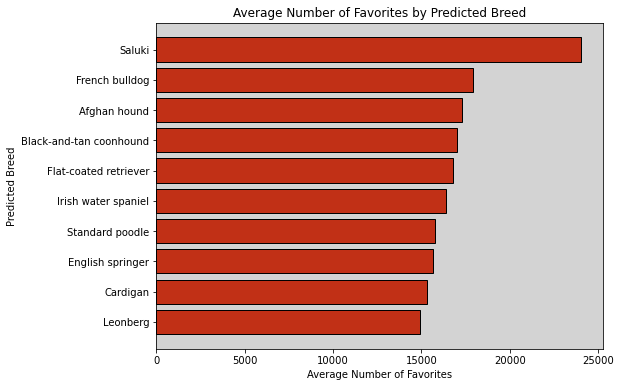

In [76]:
# Create a horizontal bar chart to show the first predictions with the highest average favorite count
df_favorite = true_image_pred_df.groupby('p1')['favorite_count'].mean().reset_index()
df_sorted = df_favorite.sort_values('favorite_count').tail(10)
width = df_sorted['favorite_count']
y = df_sorted['p1']

fig, ax = plt.subplots(figsize=(8,6))
fav = plt.barh(y, width, color="#C13016", edgecolor=['Black'] * len(y))
ax.set_facecolor('#D3D3D3')
plt.xlabel('Average Number of Favorites')
plt.ylabel('Predicted Breed')
plt.title('Average Number of Favorites by Predicted Breed')
plt.show();

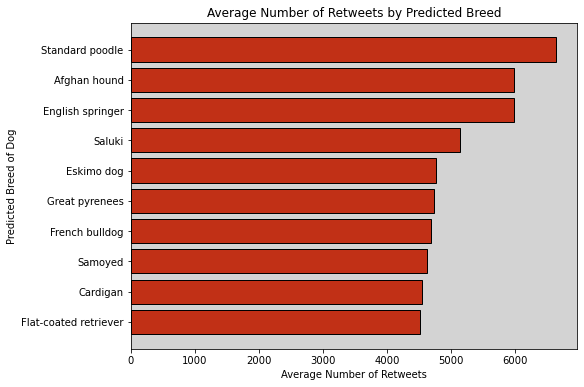

In [77]:
# Create a horizontal bar chart to show the first predictions with the highest average favorite count
df_retweet = true_image_pred_df.groupby('p1')['retweet_count'].mean().reset_index()
df_sorted = df_retweet.sort_values('retweet_count').tail(10)
width = df_sorted['retweet_count']
y = df_sorted['p1']

fig, ax = plt.subplots(figsize=(8,6))
fav = plt.barh(y, width, color="#C13016", edgecolor=['Black'] * len(y))
ax.set_facecolor('#D3D3D3')
plt.xlabel('Average Number of Retweets')
plt.ylabel('Predicted Breed of Dog')
plt.title('Average Number of Retweets by Predicted Breed')
plt.show();

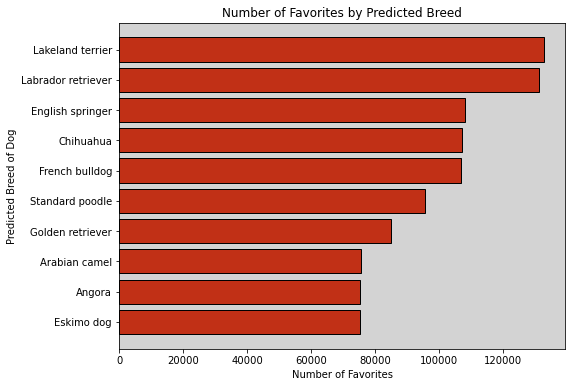

In [78]:
# Create a horizontal bar chart to show the first predictions with the highest favorite count

df_sorted = cleaned_df.sort_values('favorite_count').tail(10)
width = df_sorted['favorite_count']
y = df_sorted['p1']

fig, ax = plt.subplots(figsize=(8,6))
fav = plt.barh(y, width, color="#C13016", edgecolor=['Black'] * len(y))
ax.set_facecolor('#D3D3D3')
plt.xlabel('Number of Favorites')
plt.ylabel('Predicted Breed of Dog')
plt.title('Number of Favorites by Predicted Breed')
plt.show();

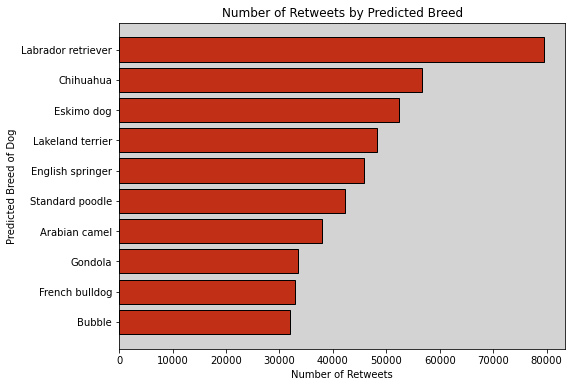

In [79]:
# Create a horizontal bar chart to show the first predictions with the highest retweet count

df_sorted = cleaned_df.sort_values('retweet_count').tail(10)
width = df_sorted['retweet_count']
y = df_sorted['p1']

fig, ax = plt.subplots(figsize=(8,6))
fav = plt.barh(y, width, color="#C13016", edgecolor=['Black'] * len(y))
ax.set_facecolor('#D3D3D3')
plt.xlabel('Number of Retweets')
plt.ylabel('Predicted Breed of Dog')
plt.title('Number of Retweets by Predicted Breed')
plt.show();

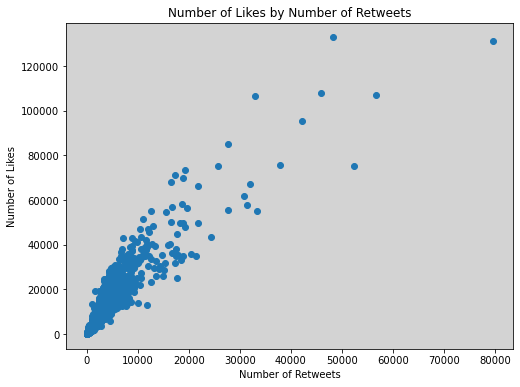

In [80]:
X = cleaned_df.retweet_count
Y = cleaned_df.favorite_count

fig, ax = plt.subplots(figsize=(8,6))
fav = plt.scatter(X, Y)
ax.set_facecolor('#D3D3D3')
plt.xlabel('Number of Retweets')
plt.ylabel('Number of Likes')
plt.title('Number of Likes by Number of Retweets')
plt.show();

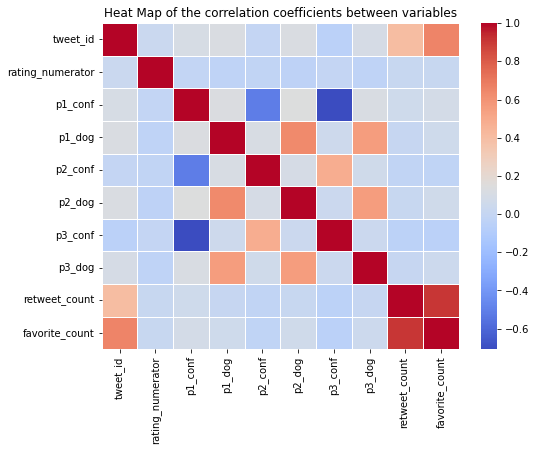

<Figure size 432x288 with 0 Axes>

In [81]:
import seaborn as sns

data_set = cleaned_df
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(data_set.corr(), linewidth=0.5, cmap='coolwarm')
plt.title("Heat Map of the correlation coefficients between variables")
plt.show()
plt.savefig('heat_map.png')